In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import docx
import pickle
import plotly.express as px
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

In [3]:
with open("Data Crawling/month_bestseller_titles_list", "rb") as fp:   # Unpickling
    titles = pickle.load(fp)
    
with open("Data Crawling/computer_titles_list", "rb") as fp:   # Unpickling
    computer_titles = pickle.load(fp)
    
with open("Data Crawling/curriculum_titles_list", "rb") as fp:   # Unpickling
    curriculum_titles = pickle.load(fp)
    
with open("Data Crawling/kid_titles_list", "rb") as fp:   # Unpickling
    kid_titles = pickle.load(fp)
    
with open("Data Crawling/novel_titles_list", "rb") as fp:   # Unpickling
    novel_titles = pickle.load(fp)

In [4]:
print(len(titles),len(computer_titles),len(curriculum_titles),len(kid_titles),len(novel_titles))

2419 1055 1577 2419 2419


In [5]:
doc = docx.Document('stopwords-Farsi1.docx')
perstops={p.text for p in doc.paragraphs}
stops=perstops.union({
'رمان','کتاب','جلد','پنج','هفت','هشت','نمی','سال','چهار','اثر','کوتاه','صوتی','می','مجموعه'
,'آثار','نسخه','قسمت','دیگر','پادکست','اپیزود','برای','بخش','های','شماره','روز','داستان','نشینان','خلاصه','کردن','کنید'
                     })

In [6]:
len(stops)

1284

In [7]:
def my_tokenizer(s):
    tokens=word_tokenize(s)
    tokens=[t for t in tokens if len(t)>2]
    tokens=[t for t in tokens if t not in stops]
    return tokens

In [20]:
save_format='.jpg'
save_path='images/'
mycolor=input()
n_word=int(input())

orange
20


In [21]:
vectorizer=CountVectorizer(binary=True,tokenizer=my_tokenizer)
x=vectorizer.fit_transform(titles)
x_t=x.T

vec_words=vectorizer.get_feature_names()

clist=np.array([])
for i in range(x_t.shape[0]):
    count=x_t[i,:].sum()
    clist=np.append(clist,[count])
tops_idx=clist.argsort()[-n_word:]
top_words=[vec_words[i] for i in tops_idx[::-1]]
ctop_words=[int(clist[i]) for i in tops_idx[::-1]]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10)  , dpi=300)
plt.title(fa(f'{len(titles)} جلد از پر فروش ترین های ماه'))
plt.bar([fa(w) for w in top_words],ctop_words,color=mycolor)
plt.yticks(range(0,max(ctop_words)+1,10))
plt.legend([fa('تعداد تکرار لغت در عنوان')])
#plt.show()
plt.savefig(save_path+'bestsellers'+save_format)
plt.close()

In [22]:
vectorizer=CountVectorizer(binary=True,tokenizer=my_tokenizer)
computerx=vectorizer.fit_transform(computer_titles)
computerx_t=computerx.T

computer_words=vectorizer.get_feature_names()

clist=np.array([])
for i in range(computerx_t.shape[0]):
    count=computerx_t[i,:].sum()
    clist=np.append(clist,[count])
tops_idx=clist.argsort()[-n_word:]
top_words=[computer_words[j] for j in tops_idx[::-1]]
ctop_words=[int(clist[i]) for i in tops_idx[::-1]]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10)  , dpi=300)
plt.title(fa(f'{len(computer_titles)} جلد از پر فروش ترین های کامپیوتر'))
plt.bar([fa(w) for w in top_words],ctop_words,color=mycolor)
plt.yticks(range(0,max(ctop_words)+1,10))
plt.legend([fa('تعداد تکرار لغت در عنوان')])
#plt.show()
plt.savefig(save_path+'computers'+save_format)
plt.close()

In [23]:
vectorizer=CountVectorizer(binary=True,tokenizer=my_tokenizer)
curriculumx=vectorizer.fit_transform(curriculum_titles)
curriculumx_t=curriculumx.T

curriculum_words=vectorizer.get_feature_names()

clist=np.array([])
for i in range(curriculumx_t.shape[0]):
    count=curriculumx_t[i,:].sum()
    clist=np.append(clist,[count])
tops_idx=clist.argsort()[-n_word:]
top_words=[curriculum_words[j] for j in tops_idx[::-1]]
ctop_words=[int(clist[i]) for i in tops_idx[::-1]]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10)  , dpi=300)
plt.title(fa(f'{len(curriculum_titles)} جلد از پر فروش ترین های درسی و آموزشی'))
plt.bar([fa(w) for w in top_words],ctop_words,color=mycolor)
plt.yticks(range(0,max(ctop_words)+1,10))
plt.legend([fa('تعداد تکرار لغت در عنوان')])
#plt.show()
plt.savefig(save_path+'curriculums'+save_format)
plt.close()

In [24]:
vectorizer=CountVectorizer(binary=True,tokenizer=my_tokenizer)
kidx=vectorizer.fit_transform(kid_titles)
kidx_t=kidx.T

kid_words=vectorizer.get_feature_names()

clist=np.array([])
for i in range(kidx_t.shape[0]):
    count=kidx_t[i,:].sum()
    clist=np.append(clist,[count])
tops_idx=clist.argsort()[-n_word:]
top_words=[kid_words[j] for j in tops_idx[::-1]]
ctop_words=[int(clist[i]) for i in tops_idx[::-1]]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10)  , dpi=300)
plt.title(fa(f'{len(kid_titles)} جلد از پر فروش ترین های کودک'))
plt.bar([fa(w) for w in top_words],ctop_words,color=mycolor)
plt.yticks(range(0,max(ctop_words)+1,10))
plt.legend([fa('تعداد تکرار لغت در عنوان')])
#plt.show()
plt.savefig(save_path+'kids'+save_format)
plt.close()

In [25]:
vectorizer=CountVectorizer(binary=True,tokenizer=my_tokenizer)
novelx=vectorizer.fit_transform(novel_titles)
novelx_t=novelx.T

novel_words=vectorizer.get_feature_names()

clist=np.array([])
for i in range(novelx_t.shape[0]):
    count=novelx_t[i,:].sum()
    clist=np.append(clist,[count])
tops_idx=clist.argsort()[-n_word:]
top_words=[novel_words[j] for j in tops_idx[::-1]]
ctop_words=[int(clist[i]) for i in tops_idx[::-1]]

plt.figure(figsize=(20,10)  , dpi=300)
plt.title(fa(f'{len(novel_titles)} جلد از پر فروش ترین های داستان و رمان'))
plt.bar([fa(w) for w in top_words],ctop_words,color=mycolor)
plt.yticks(range(0,max(ctop_words)+1,10))
plt.legend([fa('تعداد تکرار لغت در عنوان')])
#plt.show()
plt.savefig(save_path+'novels'+save_format)
plt.close()

In [26]:
topicvectorizer=TfidfVectorizer(tokenizer=my_tokenizer)
topicx=topicvectorizer.fit_transform(titles)

topicsvd=TruncatedSVD(n_components=10)
topicsvd.fit(topicx)

TruncatedSVD(n_components=10)

In [27]:
def plot_top_words(model, feature_names, n_top_words=10, title='Topics to word'):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 : -1]
        top_features = [fa(feature_names[i]) for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=18)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

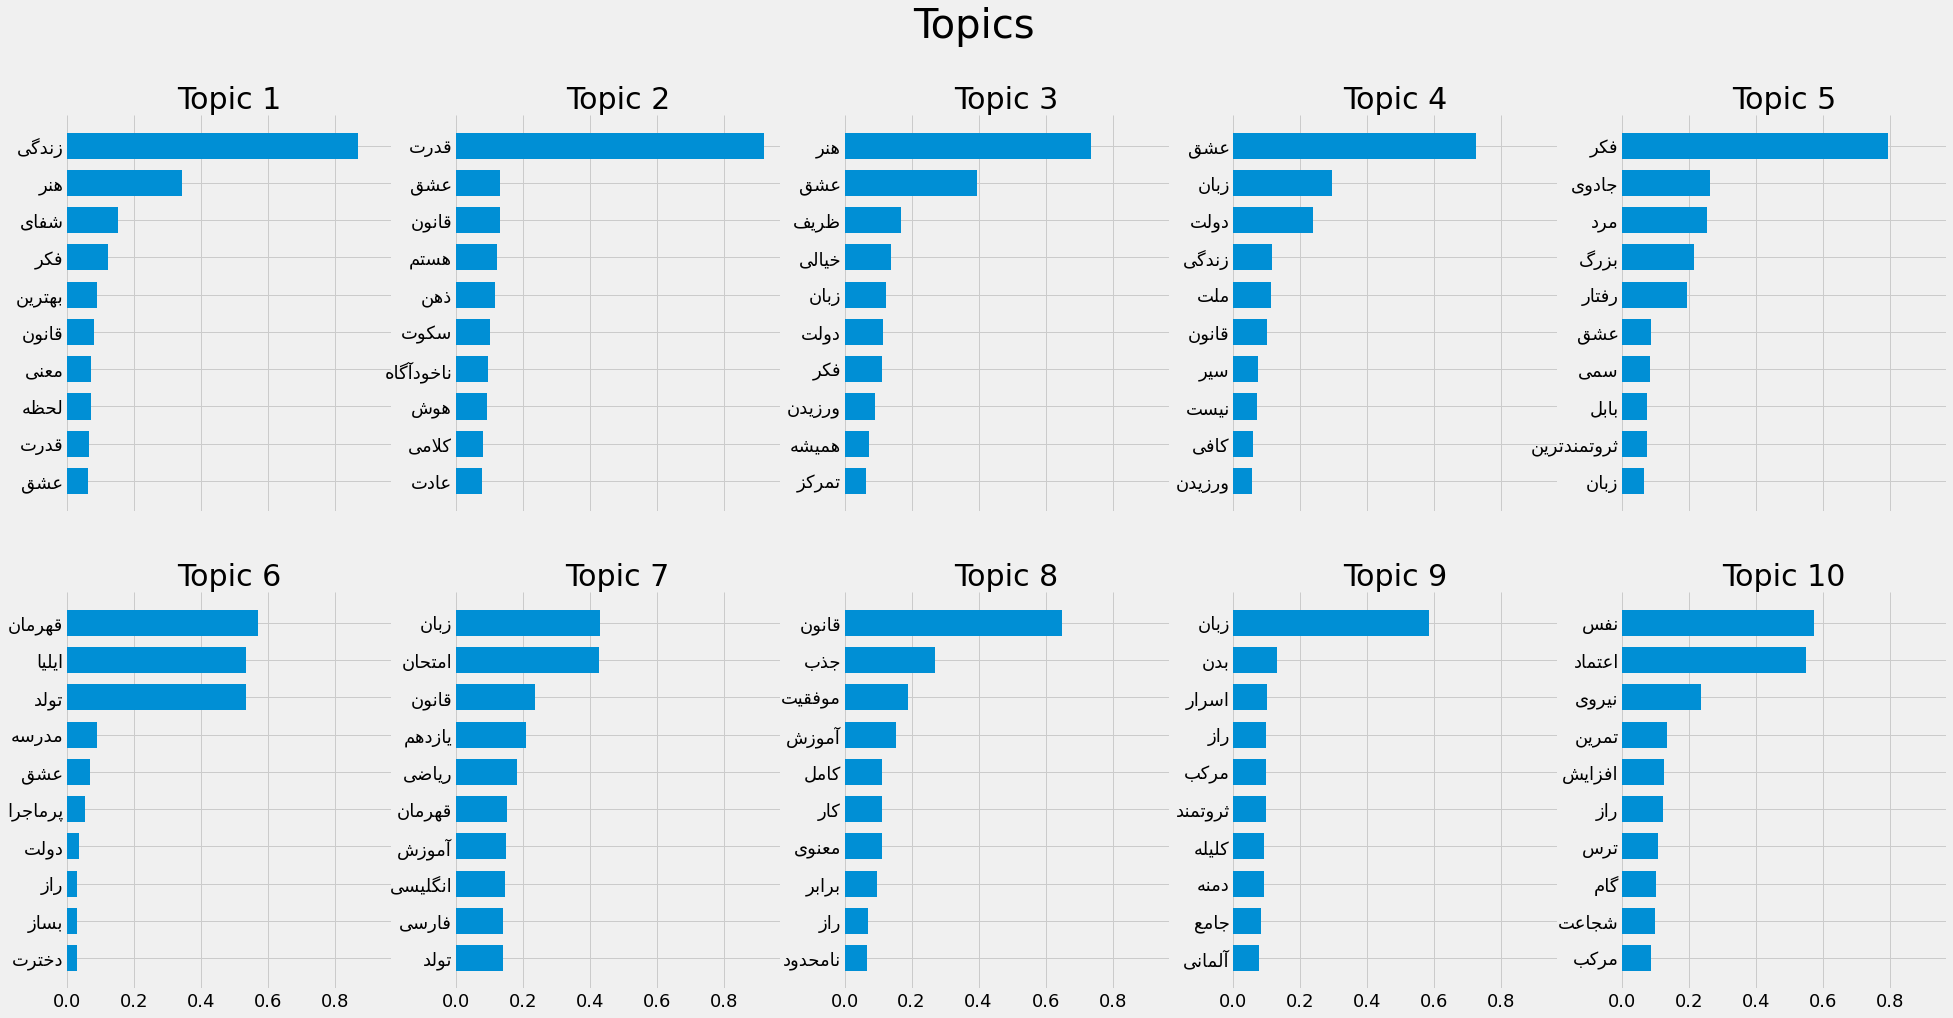

In [28]:
plot_top_words(topicsvd,vec_words,title='Topics')
plt.savefig('topics.jpg')

In [29]:
svd=TruncatedSVD()
z=svd.fit_transform(x_t)

In [30]:
z.shape

(2466, 2)

In [31]:
fig=px.scatter(x=z[:,1],y=z[:,0],text=vec_words,size_max=80)
fig.update_traces(textposition='top center')
fig.show()